In [1]:
################################################
## setup to use GPU TensorFlow on Colab -- cwr
################################################

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()

#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

if device_name == '/device:GPU:0':
  print('Found GPU at: {}'.format(device_name))
else:
  print('GPU device not found')

GPU device not found


In [2]:
!ls /

bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr


In [3]:
!ls /content/drive/

MyDrive


In [4]:
!ls /content/drive/MyDrive/PredatorEye/mini_training_set/

azXzjfBAVH_816_668.jpeg  pngeVHaCDF_230_820.jpeg  sXFdGeQwiF_777_456.jpeg
hSCjLPGMQT_483_314.jpeg  QJvCUSOVWk_414_713.jpeg  uNFOorIfEt_149_234.jpeg
hTqTdsFhNv_844_420.jpeg  qrXKbdMILt_343_433.jpeg  vkbrxedwxK_825_668.jpeg


In [5]:
fcd_ts_dir = '/content/drive/My Drive/PredatorEye/mini_training_set/'
#with open(fcd_ts_dir + 'foo.txt', 'w') as f:
#  f.write('Hello Google Drive!')
#!cat /content/drive/My\ Drive/PredatorEye/mini_training_set/foo.txt

In [6]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


In [7]:
# load and show an image with Pillow
from PIL import Image
test_path = fcd_ts_dir + 'azXzjfBAVH_816_668.jpeg'
# load the image
image = Image.open(test_path)
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
#image.show()

JPEG
RGB
(1024, 1024)


uint8
(1024, 1024, 3)


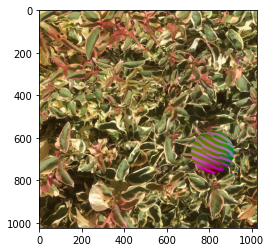

In [8]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(test_path)
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [9]:
from os import listdir
dir_contents = listdir(fcd_ts_dir)
for x in dir_contents: print(x)

azXzjfBAVH_816_668.jpeg
hSCjLPGMQT_483_314.jpeg
hTqTdsFhNv_844_420.jpeg
pngeVHaCDF_230_820.jpeg
QJvCUSOVWk_414_713.jpeg
qrXKbdMILt_343_433.jpeg
sXFdGeQwiF_777_456.jpeg
uNFOorIfEt_149_234.jpeg
vkbrxedwxK_825_668.jpeg


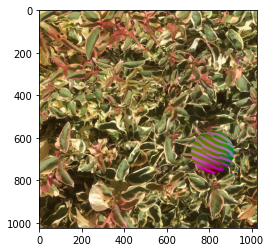

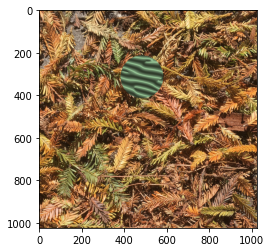

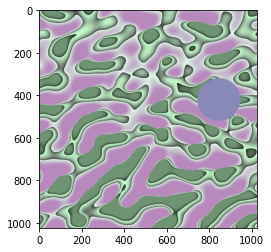

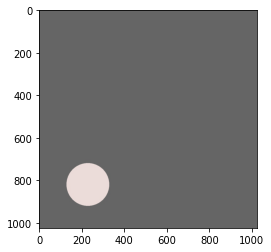

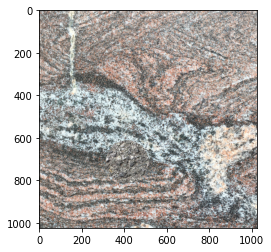

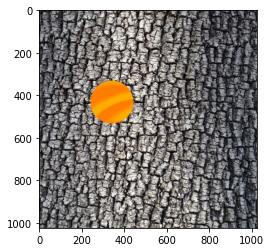

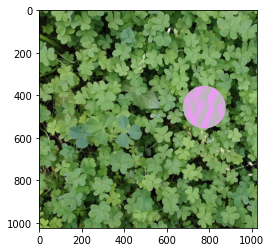

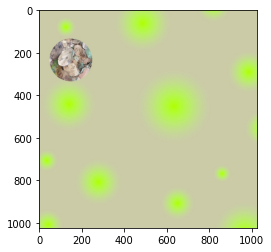

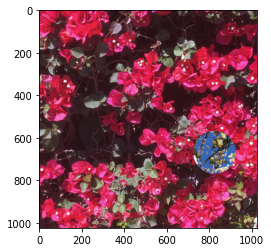

In [10]:
from os.path import join
def show_image_from_pathname(image_pathname):
  # load image as pixel array
  data = image.imread(image_pathname)
  # display the array of pixels as an image
  pyplot.imshow(data)
  pyplot.show()
for x in dir_contents: show_image_from_pathname(join(fcd_ts_dir, x))

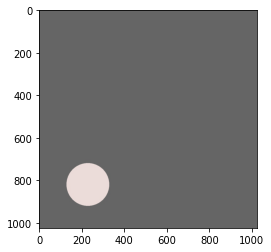

In [11]:
simple_dot_path = join(fcd_ts_dir, 'pngeVHaCDF_230_820.jpeg')
show_image_from_pathname(simple_dot_path)

In [12]:
from PIL import Image
from numpy import asarray

simple_dot_path = join(fcd_ts_dir, 'pngeVHaCDF_230_820.jpeg')

# load the image
image = Image.open(simple_dot_path)
print('original image:')
print(image.format)
print(image.mode)
print(image.size)
print()

# convert image to numpy array
data = asarray(image)
# summarize shape
print('numpy array:')
print(data.shape)
print()

# create Pillow image
image2 = Image.fromarray(data)
# summarize image details
print('new image:')
print(image2.format)
print(image2.mode)
print(image2.size)


original image:
JPEG
RGB
(1024, 1024)

numpy array:
(1024, 1024, 3)

new image:
None
RGB
(1024, 1024)


In [13]:
import numpy as np
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(a[0,0])
print(a[2])
print(a[:, 1])
print()

b = np.array([[[0, 1],
               [2, 3]],
              [[4, 5],
               [6, 7]]])
print(b[0, 0, 0])
print(b[0])
print(b[:, 0])
print(b[1, 1])
print()

# Upper left pixel
print(data[0, 0])
# Inside disk (?) pixel
print(data[200, 800])
 # This [rows,cols] order works, but feels backwards:
print(data[800, 200])

1
[7 8 9]
[2 5 8]

0
[[0 1]
 [2 3]]
[[0 1]
 [4 5]]
[6 7]

[101 101 101]
[101 101 101]
[235 220 217]


In [14]:
text = 'pngeVHaCDF_230_820.jpeg'
print(text.split('_'))
print(text.split('.')[0].split('_'))
print(text.split('.')[0].split('_')[1:2])
# this works, but I don't understand the 3
print(text.split('.')[0].split('_')[1:3])

# must be a way to map a function over elements of list
xy = text.split('.')[0].split('_')[1:3]
print([int(xy[0]), int(xy[1])])

# like this:
print(list(map(int, xy)))

def fcd_filename_to_xy_pair(filename):
    without_extension = filename.split('.')[0]
    two_numeric_strings = without_extension.split('_')[1:3]
    two_ints = list(map(int, two_numeric_strings))
    return two_ints

print(fcd_filename_to_xy_pair('pngeVHaCDF_230_820.jpeg'))

['pngeVHaCDF', '230', '820.jpeg']
['pngeVHaCDF', '230', '820']
['230']
['230', '820']
[230, 820]
[230, 820]
[230, 820]


In [15]:
# thinking about loss function/class for my "regression" problem
# (from https://keras.io/api/losses/regression_losses/#meansquarederror-class)

y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [1., 0.]]
# Using 'auto'/'sum_over_batch_size' reduction type.
mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()

0.5

In [16]:
# This is a model constructor from DLAVA (Listing B3-41):
#
# def make_striding_cnn_model():
#     model = Sequential()
#     model.add(Conv2D(30, (5, 5), activation='relu', padding='same',
#                      strides=(2, 2), kernel_constraint=MaxNorm(3),
#                      input_shape=(image_height, image_width, 1)))
#     model.add(Dropout(0.2))
#     model.add(Conv2D(16, (3, 3), activation='relu', padding='same', 
#                      strides=(2, 2), kernel_constraint=MaxNorm(3)))
#     model.add(Dropout(0.2))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(number_of_classes, activation='softmax')) 
#     model.compile(loss='categorical_crossentropy', optimizer='adam', 
#                   metrics=["accuracy"])
#     return model

# Now modified as a starting point for my project:

def make_striding_cnn_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), activation='relu', padding='same',
                     strides=(2, 2), kernel_constraint=MaxNorm(3),
                     input_shape=(image_height, image_width, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', 
                     strides=(2, 2), kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    #
    # instead of softmax, maybe a Dense layer with two neurons (x, y)?
    #
    # model.add(Dense(number_of_classes, activation='softmax'))
    model.add(Dense(2, activation='relu')) ### COMPLETELY UNTESTED!! ###
    #
    # Use MSE in place of categorical_crossentropy
    # since my problem is more like regression
    #
    # model.compile(loss='categorical_crossentropy', optimizer='adam', 
    #               metrics=["accuracy"])
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=["accuracy"])
    return model

In [19]:
# Prototype function to load FCD data from directory pathname

fcd_images = []
fcd_labels = []

from os import listdir
from os.path import join

def fcd_normalized_xy(filename, pixels):
    pixel_coordinates = fcd_filename_to_xy_pair(filename)
    print(pixel_coordinates)
    print(pixels.shape)
    normalized = [pixel_coordinates[0] / pixels.shape[0],
                  pixel_coordinates[1] / pixels.shape[1]]
    print(normalized)
    return normalized

def read_fcd_data_from_directory(directory_pathname):
    directory_contents = listdir(directory_pathname)
    for filename in directory_contents:
        # Numpy pixel array of image object.
        pixels = asarray(Image.open(simple_dot_path))
        # Accumulate: numpy pixel array of image object.
        fcd_images.append(pixels)
        # Accumulate: disk center XY position ground truth.
        fcd_labels.append(fcd_normalized_xy(filename, pixels))

# Test
read_fcd_data_from_directory(fcd_ts_dir)
print(len(fcd_images))
print(fcd_labels)


[816, 668]
(1024, 1024, 3)
[0.796875, 0.65234375]
[483, 314]
(1024, 1024, 3)
[0.4716796875, 0.306640625]
[844, 420]
(1024, 1024, 3)
[0.82421875, 0.41015625]
[230, 820]
(1024, 1024, 3)
[0.224609375, 0.80078125]
[414, 713]
(1024, 1024, 3)
[0.404296875, 0.6962890625]
[343, 433]
(1024, 1024, 3)
[0.3349609375, 0.4228515625]
[777, 456]
(1024, 1024, 3)
[0.7587890625, 0.4453125]
[149, 234]
(1024, 1024, 3)
[0.1455078125, 0.228515625]
[825, 668]
(1024, 1024, 3)
[0.8056640625, 0.65234375]
9
[[0.796875, 0.65234375], [0.4716796875, 0.306640625], [0.82421875, 0.41015625], [0.224609375, 0.80078125], [0.404296875, 0.6962890625], [0.3349609375, 0.4228515625], [0.7587890625, 0.4453125], [0.1455078125, 0.228515625], [0.8056640625, 0.65234375]]


In [ ]:
# Load and prep FCD data set

# # load MNIST data and save sizes
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# image_height = X_train.shape[1]
# image_width = X_train.shape[2]
# number_of_pixels = image_height * image_width

# # convert to floating-point
# X_train = keras_backend.cast_to_floatx(X_train)
# X_test = keras_backend.cast_to_floatx(X_test)

# # scale data to range [-1, 1]
# X_train = np.interp(X_train, [0, 255], [-1,1])
# X_test = np.interp(X_test, [0, 255], [-1,1])

# # save original y_train and y_test
# original_y_train = y_train
# original_y_test = y_test

# # replace label data with one-hot encoded versions
# number_of_classes = 1 + max(np.append(y_train, y_test))
# y_train = to_categorical(y_train, num_classes=number_of_classes)
# y_test = to_categorical(y_test, num_classes=number_of_classes)

# # reshape sample data to 4D tensor using channels_last convention 
# X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
# X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [-1, 1]
X_train = np.interp(X_train, [0, 255], [-1,1])
X_test = np.interp(X_test, [0, 255], [-1,1])

# save original y_train and y_test
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape sample data to 4D tensor using channels_last convention 
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

NameError: ignored